IndexError: index 2 is out of bounds for axis 0 with size 2

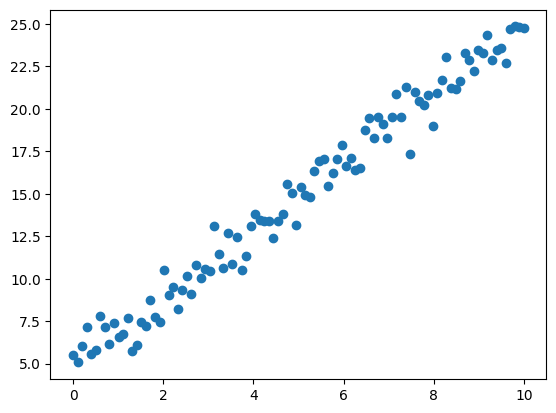

In [2]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize

import matplotlib.pyplot as plt

# Define the curve-fit models
def linear_model(params, x):
    return params[0] * x + params[1]

def quadratic_model(params, x):
    return params[0] * x**2 + params[1] * x + params[2]

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_true = 2 * x + 5
noise = np.random.normal(0, 1, size=len(x))
y = y_true + noise
plt.scatter(x, y, label='data')

# Define the objective function for curve fitting
def objective(params, model, x, y):
    y_pred = model(params, x)
    return np.sum((y - y_pred)**2)

# Perform curve fitting and bootstrap resampling
n_bootstrap = 1000
models = [linear_model, quadratic_model]
results = []

for model in models:
    bootstrap_params = []
    for _ in range(n_bootstrap):
        bootstrap_indices = np.random.choice(range(len(x)), size=len(x), replace=True)
        bootstrap_x = x[bootstrap_indices]
        bootstrap_y = y[bootstrap_indices]

        initial_params = np.random.randn(model.__code__.co_argcount)  # Random initialization
        result = minimize(objective, initial_params, args=(model, bootstrap_x, bootstrap_y))
        bootstrap_params.append(result.x)

    bootstrap_params = np.array(bootstrap_params)

    # Calculate parameter means and standard errors
    params_mean = np.mean(bootstrap_params, axis=0)
    params_std = np.std(bootstrap_params, axis=0)

    # Calculate AIC and BIC
    n_samples = len(x)
    n_params = model.__code__.co_argcount
    residuals = np.sum((y - model(params_mean, x))**2)
    aic = n_samples * np.log(residuals / n_samples) + 2 * n_params
    bic = n_samples * np.log(residuals / n_samples) + n_params * np.log(n_samples)

    results.append({
        'model': model.__name__,
        'params_mean': params_mean,
        'params_std': params_std,
        'aic': aic,
        'bic': bic
    })

# Print the results
for result in results:
    print('Model:', result['model'])
    print('Parameter Mean:', result['params_mean'])
    print('Parameter Standard Error:', result['params_std'])
    print('AIC:', result['aic'])
    print('BIC:', result['bic'])
    print('------------------------')


In [ ]:
pr